In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/tmp/ipykernel_9582/1929692246.py:72: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitleのスペースを確保
/tmp/ipykernel_9582/1929692246.py:72: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitleのスペースを確保
/tmp/ipykernel_9582/1929692246.py:72: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitleのスペースを確保
/tmp/ipykernel_9582/1929692246.py:72: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitleのスペースを確保
/tmp/ipykernel_9582/1929692246.py:72: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitleのスペースを確保
/tmp/ipykernel_9582/1929692246.py:72: UserWar

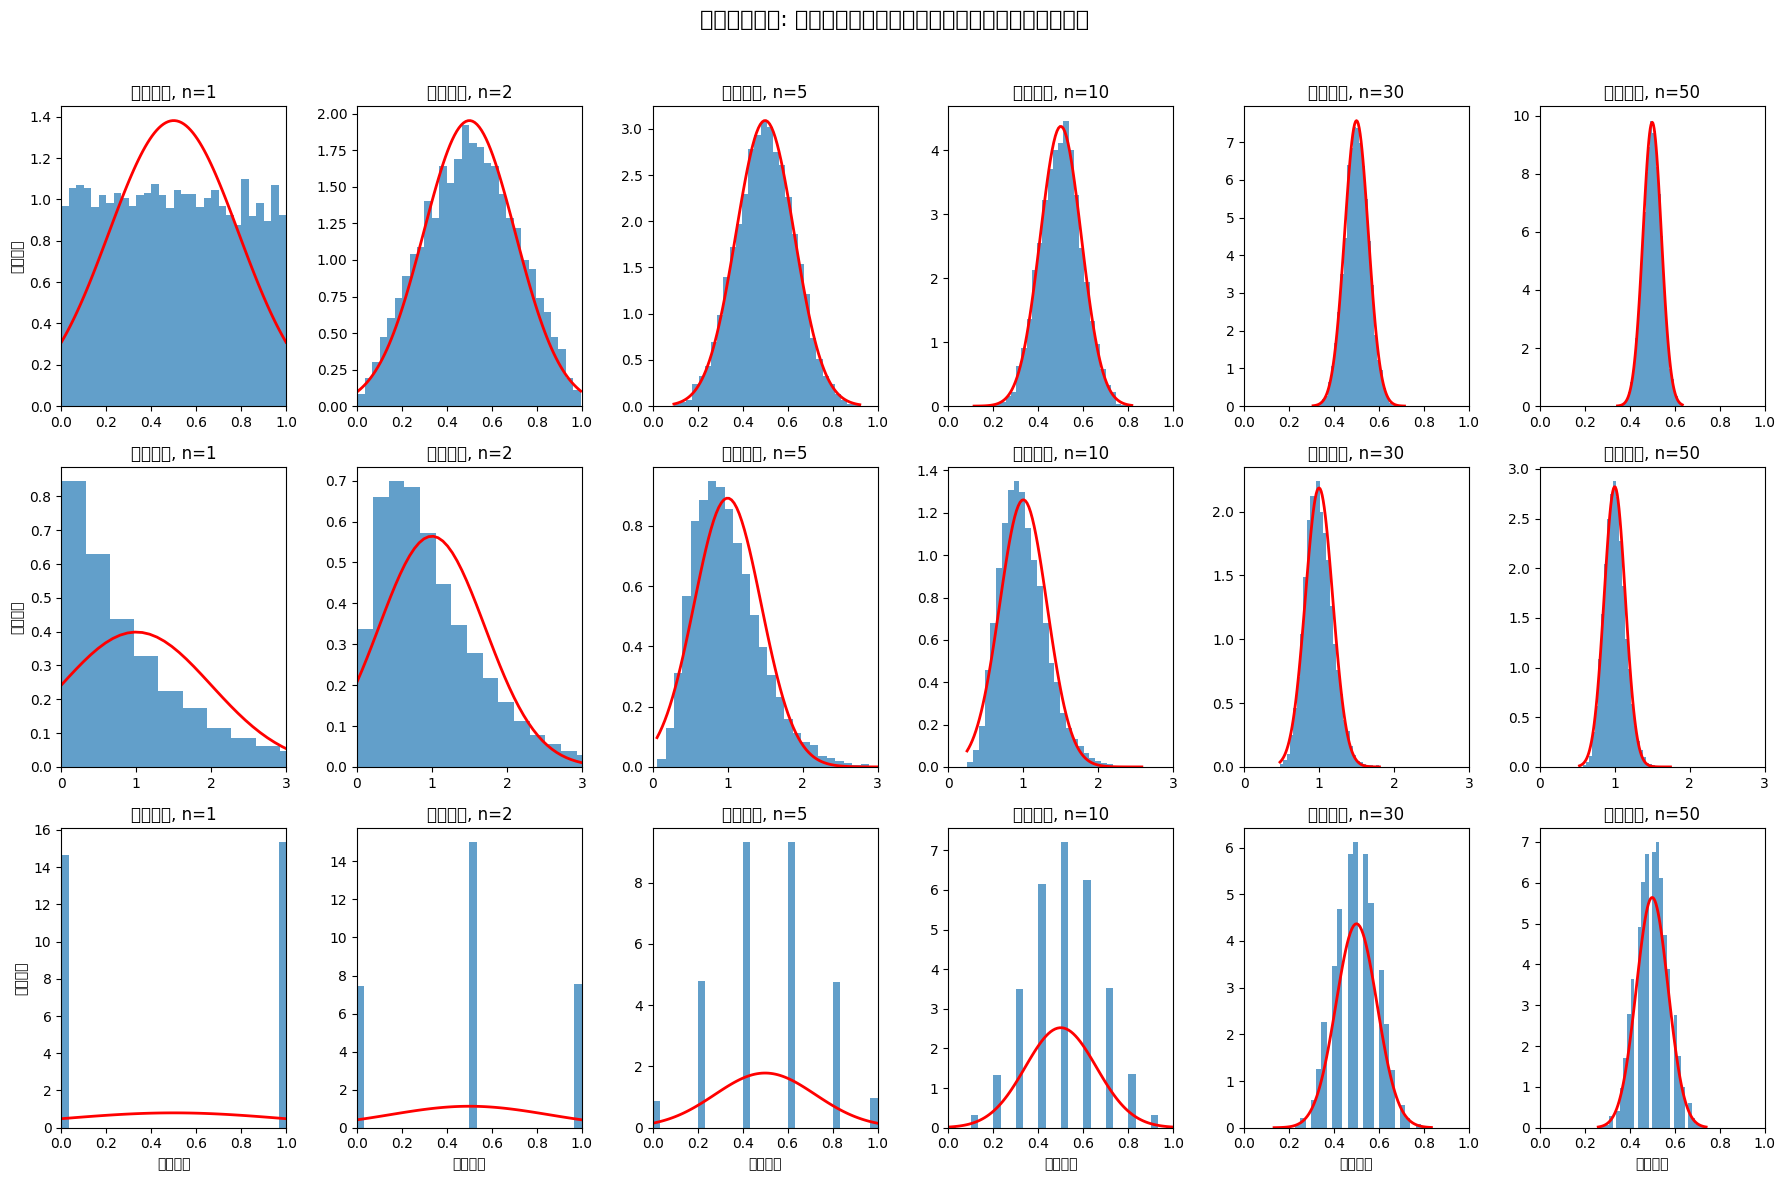

シャピロ・ウィルクテストによる正規性の評価 (p値)
サンプルサイズが大きいほど、標本平均の分布は正規分布に近づく

サンプルサイズ | 一様分布 | 指数分布 | 二項分布
------------------------------------------------------------
            1 | 0.000000 | 0.000000 | 0.000000
            2 | 0.000004 | 0.000000 | 0.000000
            5 | 0.117676 | 0.000000 | 0.000000
           10 | 0.551255 | 0.000000 | 0.000000
           30 | 0.263678 | 0.000021 | 0.000000
           50 | 0.222397 | 0.008836 | 0.000001


In [3]:
# ======== 中心極限定理のデモンストレーション ========
# 中心極限定理: 独立した確率変数の和（または平均）は、サンプルサイズが大きくなると
# 元の分布に関わらず正規分布に近づく

# パラメータ設定
np.random.seed(42)
sample_sizes = [1, 2, 5, 10, 30, 50]  # さまざまなサンプルサイズ
n_experiments = 10000  # 各サンプルサイズで実行する実験回数

# 異なる分布からのサンプル平均の分布を調査
distributions = {
    '一様分布': {'func': np.random.uniform, 'args': (0, 1)},
    '指数分布': {'func': np.random.exponential, 'args': (1,)},
    '二項分布': {'func': lambda size: np.random.binomial(1, 0.5, size)}
}

# サブプロットの設定
fig, axes = plt.subplots(len(distributions), len(sample_sizes), figsize=(18, 12))
fig.suptitle('中心極限定理: 異なる分布とサンプルサイズでの標本平均の分布', fontsize=16)

# 各分布とサンプルサイズの組み合わせでの標本平均を計算
for i, (dist_name, dist_info) in enumerate(distributions.items()):
    for j, n in enumerate(sample_sizes):
        # n_experimentsの回数、n個のサンプルを取り、その平均を計算
        sample_means = []
        for _ in range(n_experiments):
            if dist_name == '二項分布':
                samples = dist_info['func'](n)  # 二項分布の場合は特別な処理
            else:
                samples = dist_info['func'](*dist_info['args'], size=n)
            sample_means.append(np.mean(samples))
        
        # ヒストグラムの作成
        axes[i, j].hist(sample_means, bins=30, density=True, alpha=0.7)
        
        # 理論的な正規分布を重ねる
        if dist_name == '一様分布':
            # 一様分布 U(0,1) の平均と分散
            mu, sigma = 0.5, 1/np.sqrt(12)
        elif dist_name == '指数分布':
            # 指数分布(λ=1) の平均と分散
            mu, sigma = 1, 1
        else:  # 二項分布
            # 二項分布 B(1, 0.5) の平均と分散
            mu, sigma = 0.5, 0.5
        
        # 標本平均の理論的な分布のパラメータ
        # 標本平均の分散は、元の分布の分散 / サンプルサイズ
        x = np.linspace(min(sample_means), max(sample_means), 100)
        theoretical_pdf = stats.norm.pdf(x, mu, sigma/np.sqrt(n))
        axes[i, j].plot(x, theoretical_pdf, 'r-', linewidth=2)
        
        # グラフのタイトルとラベル
        axes[i, j].set_title(f'{dist_name}, n={n}')
        
        # x軸の範囲を統一（分布ごとに）
        if dist_name == '一様分布':
            axes[i, j].set_xlim(0, 1)
        elif dist_name == '指数分布':
            axes[i, j].set_xlim(0, 3)
        else:  # 二項分布
            axes[i, j].set_xlim(0, 1)
        
        # 最初の列にy軸ラベル
        if j == 0:
            axes[i, j].set_ylabel('確率密度')
        
        # 最後の行にx軸ラベル
        if i == len(distributions) - 1:
            axes[i, j].set_xlabel('標本平均')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitleのスペースを確保
plt.show()

# ======== 異なるサンプルサイズでの標本平均の分布の量的評価 ========
# 正規性の検定（シャピロ・ウィルクテスト）
print("シャピロ・ウィルクテストによる正規性の評価 (p値)")
print("サンプルサイズが大きいほど、標本平均の分布は正規分布に近づく")
print("\nサンプルサイズ | 一様分布 | 指数分布 | 二項分布")
print("-" * 60)

for n in sample_sizes:
    uniform_means = [np.mean(np.random.uniform(0, 1, n)) for _ in range(1000)]
    exp_means = [np.mean(np.random.exponential(1, n)) for _ in range(1000)]
    binom_means = [np.mean(np.random.binomial(1, 0.5, n)) for _ in range(1000)]
    
    # シャピロ・ウィルクテスト（p値が大きいほど正規分布に近い）
    _, p_uniform = stats.shapiro(uniform_means)
    _, p_exp = stats.shapiro(exp_means)
    _, p_binom = stats.shapiro(binom_means)
    
    print(f"{n:13} | {p_uniform:.6f} | {p_exp:.6f} | {p_binom:.6f}")